<a href="https://colab.research.google.com/github/Hariharan-Vengadasubramanian/ML-Hackathon/blob/main/Hackathon_1_Multilabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilabel Classification 

Determine Product_Holding_B2. Target Variable of type list.
Input Variables are of type Interger, Categorical Variables and List 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read Train and Test file 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_go05W65.csv to train_go05W65.csv


In [ ]:
train_data = pd.read_csv("train_go05W65.csv")

# Data Description

In [ ]:
#Detailed Summary of train Data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37748 entries, 0 to 37747
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         37748 non-null  object
 1   Gender              37748 non-null  object
 2   Age                 37748 non-null  int64 
 3   Vintage             37748 non-null  int64 
 4   Is_Active           37748 non-null  int64 
 5   City_Category       37748 non-null  object
 6   Customer_Category   37748 non-null  object
 7   Product_Holding_B1  37748 non-null  object
 8   Product_Holding_B2  37748 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [ ]:
train_data.shape

(37748, 9)

In [ ]:
#Detailed Summary of test Data
test_data.info() 

NameError: ignored

In [ ]:
test_data.shape

(20327, 8)

# EDA for train data

Customer ID can be dropped.

Gender , City_Category, Customer_Category are type Nominal. These categorical data needs to be handled using Label Encoder.

Product_Holding_B1 is of type list. Preprocess it using Label Binarizer to convert list values into binary.

Target variable - Product_Holding_B2 is of type list. Convert it into binary values and keep it as Mutillabel target variable. 

In [ ]:
#display top 5 rows of data
train_data.head(5)

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


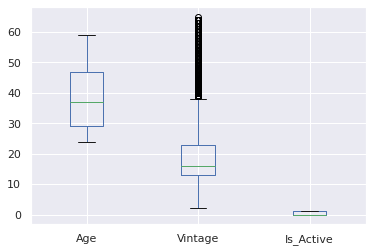

In [ ]:
train_data.plot(kind='box')

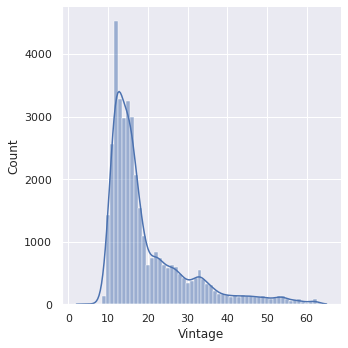

In [ ]:
# displot for Vintage
sns.set(style="darkgrid")
sns.displot(data=train_data,x='Vintage',kde=True,discrete=True) 
plt.show()

Handle Outlier for Vintage using Median Imputation 

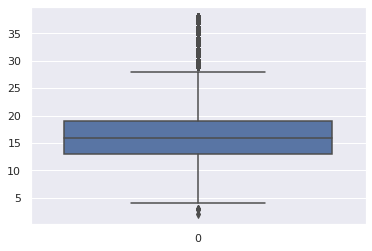

In [ ]:
q1 = train_data['Vintage'].quantile(0.25)
q3 = train_data['Vintage'].quantile(0.75)
iqr = q3 - q1
for i in train_data['Vintage']:
  Lower_tail = q1 - (1.5 * iqr)
  Upper_tail = q3 + (1.5 * iqr)
  if i > Upper_tail or i < Lower_tail:
    train_data['Vintage'] = train_data['Vintage'].replace(i,np.median(train_data['Vintage']))
sns.boxplot(data=train_data['Vintage'])
plt.show()

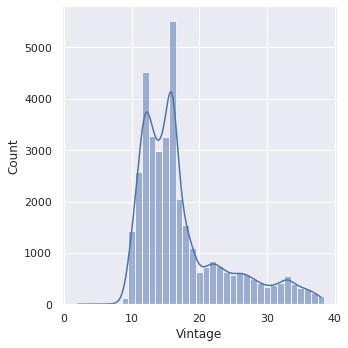

In [ ]:
# displot for Vintage
sns.set(style="darkgrid")
sns.displot(data=train_data,x='Vintage',kde=True,discrete=True) 
plt.show()

see correlation between numeric variables

In [ ]:
train_data.corr()

,Age,Vintage,Is_Active
Age,1.000000,0.003598,0.006373
Vintage,0.003598,1.000000,0.135960
Is_Active,0.006373,0.135960,1.000000


Preprocessing for PRODUCT_HOLDING_B1
Notice input data of format ['P13','P20']. Need to break this to list.

In [ ]:
train_data.head(5)

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


In [ ]:
train_data["Product_Holding_B1"]=train_data["Product_Holding_B1"].apply(eval)

In [ ]:
#display top 5 rows of data
train_data.head(5)

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,[P16],['P8']
1,CC209679,Female,47,14,1,C1,S2,"[P13, P20]",['P3']
2,CC319633,Female,59,14,0,C2,S2,[P11],['P00']
3,CC231413,Female,32,16,0,C1,S2,"[P8, P13]",['P6']
4,CC259633,Male,30,15,0,C2,S3,"[P16, P17, P21]","['P8', 'P12']"


apply MultiLabel Binarizer and convert this list to input features

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
## fit train data column in MultiLabel Binarizer
mlb.fit(train_data['Product_Holding_B1'])
len(mlb.classes_)
## will give number of unique values from list 
mlb.classes_
## split column level list as pandas dataframe column
curr_product = pd.DataFrame(mlb.fit_transform(train_data['Product_Holding_B1']),
                   columns=mlb.classes_,
                   index=train_data['Product_Holding_B1'].index)

now we can see product_holding_b1 feature has been split into multiple input features

In [ ]:
curr_product.head(10)

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
curr_product.shape

(37748, 22)

concatenates this with train data

In [ ]:
train_final=pd.concat([train_data,curr_product],axis=1)

In [ ]:
train_final.shape

(37748, 31)

In [ ]:
train_final.head(10)

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9
0,CC264719,Male,41,14,0,C1,S3,[P16],['P8'],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CC209679,Female,47,14,1,C1,S2,"[P13, P20]",['P3'],0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,CC319633,Female,59,14,0,C2,S2,[P11],['P00'],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CC231413,Female,32,16,0,C1,S2,"[P8, P13]",['P6'],0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,CC259633,Male,30,15,0,C2,S3,"[P16, P17, P21]","['P8', 'P12']",0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
5,CC384429,Female,28,12,0,C1,S2,[P17],['P16'],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,CC233048,Male,30,17,0,C1,S2,"[P16, P17]",['P8'],0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,CC370586,Male,44,16,1,C2,S2,"[P16, P21]","['P1', 'P12']",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
8,CC358694,Male,47,16,0,C2,S3,"[P13, P20]",['P12'],0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,CC316464,Male,26,12,0,C2,S3,"[P13, P21]",['P9'],0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Convert Target Variable to array format. So that we can use MultiLabel classification
Use MultiLabelBinarizer to convert list to ndarray.
use tolist() command to add ndarray as new column in dataframe

In [ ]:
train_data["Product_Holding_B2"]=train_data["Product_Holding_B2"].apply(eval)

In [ ]:
train_data["Product_Holding_B2"].head(5)

0         [P8]
1         [P3]
2        [P00]
3         [P6]
4    [P8, P12]
Name: Product_Holding_B2, dtype: object

In [ ]:
mlbp = MultiLabelBinarizer()

In [ ]:
mlbp.fit(train_data['Product_Holding_B2'])

MultiLabelBinarizer()

In [ ]:
mlbp.classes_

array(['P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P2', 'P20', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9'], dtype=object)

In [ ]:
future_product = mlbp.transform(train_data['Product_Holding_B2'])

In [ ]:
future_product

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
future_product = mlbp.fit_transform(train_data['Product_Holding_B2'])

In [ ]:
future_product.shape

(37748, 20)

add ndarray into dataframe as new column

In [ ]:
train_final['future_product']=future_product.tolist()

In [ ]:
type(future_product)

numpy.ndarray

In [ ]:
train_final.head(10)

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9,future_product
0,CC264719,Male,41,14,0,C1,S3,[P16],['P8'],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CC209679,Female,47,14,1,C1,S2,"[P13, P20]",['P3'],0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,CC319633,Female,59,14,0,C2,S2,[P11],['P00'],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CC231413,Female,32,16,0,C1,S2,"[P8, P13]",['P6'],0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CC259633,Male,30,15,0,C2,S3,"[P16, P17, P21]","['P8', 'P12']",0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,CC384429,Female,28,12,0,C1,S2,[P17],['P16'],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
6,CC233048,Male,30,17,0,C1,S2,"[P16, P17]",['P8'],0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,CC370586,Male,44,16,1,C2,S2,"[P16, P21]","['P1', 'P12']",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,CC358694,Male,47,16,0,C2,S3,"[P13, P20]",['P12'],0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,CC316464,Male,26,12,0,C2,S3,"[P13, P21]",['P9'],0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now, we handled Product_Holding_b1 and Product_Holding_B2. Drop original columns read from input. 

In [ ]:
train_final.drop(['Customer_ID','Product_Holding_B1','Product_Holding_B2'],axis=1,inplace=True)

In [ ]:
train_final.head(10)

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9,future_product
0,Male,41,14,0,C1,S3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Female,47,14,1,C1,S2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,Female,59,14,0,C2,S2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Female,32,16,0,C1,S2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Male,30,15,0,C2,S3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,Female,28,12,0,C1,S2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
6,Male,30,17,0,C1,S2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,Male,44,16,1,C2,S2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,Male,47,16,0,C2,S3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,Male,26,12,0,C2,S3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
# Label Encoded
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
train_final['Gender'] = label_encoding.fit_transform(train_final['Gender'].astype(str))

In [ ]:
train_final['City_Category'] = label_encoding.fit_transform(train_final['City_Category'].astype(str))
train_final['Customer_Category'] = label_encoding.fit_transform(train_final['Customer_Category'].astype(str))


In [ ]:
train_final.head(5)

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9,future_product
0,1,41,14,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,47,14,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,0,59,14,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,32,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,30,15,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# ML models

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.svm import LinearSVC

from google.colab import drive


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
train_final.head(2)

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9,future_product
0,1,41,14,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,47,14,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [ ]:
FEATURES = list(train_final.columns[1:])
FEATURES.remove('future_product')
FEATURES

['Age',
 'Vintage',
 'Is_Active',
 'City_Category',
 'Customer_Category',
 'P00',
 'P1',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P2',
 'P20',
 'P21',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9']

 reshape predictor variable for multilabel classification

In [ ]:
future_product = future_product.reshape(-1,20)

In [ ]:
future_product

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
shape = np.shape(future_product)
shape

(37748, 20)

Set X and Y 

In [ ]:
Y = future_product
X = FEATURES

In [ ]:

Y_train = Y.reshape(-1, 20)  



Make data ready for Multilabel Classification

In [ ]:
X,Y = make_multilabel_classification(n_samples=50000,
                                     n_classes=20,
                                     random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                test_size = 0.2,
                                                random_state = 0)  
Y_train = Y_train.reshape(-1, 20)  

MLP Classifier - Neural Network - Multi Level Perceptron ; 
Afine function - determines weighted input values; Activation function : Logistic; Other activation functions like RelU, tanh

In [ ]:
pipe = make_pipeline(StandardScaler(), ClassifierChain(MLPClassifier(hidden_layer_sizes=(10,10),
                                                                     max_iter = 1000,
                                                                     activation='logistic',
                                                                     solver='lbfgs',
                                                                     verbose=True)))
pipe.fit(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('classifierchain',
                 ClassifierChain(base_estimator=MLPClassifier(activation='logistic',
                                                              hidden_layer_sizes=(10,
                                                                                  10),
                                                              max_iter=1000,
                                                              solver='lbfgs',
                                                              verbose=True)))])

In [ ]:
Y_pred=pipe.predict(X_test)

In [ ]:
Y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Score 

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(Y_test,Y_pred))
print("\n")
acc = accuracy_score(Y_test,Y_pred,normalize=True)
prec = precision_score(Y_test,Y_pred,average='micro')
print("Precision=",prec)
print("\n")
recal = recall_score(Y_test,Y_pred,average='micro')
print("Recall=",recal)
print("\n")


Accuracy= 0.3803


Precision= 0.6956835273513959


Recall= 0.3375993600959856




In [ ]:
### results
pred_results = pd.DataFrame.from_records([{'Y_test': Y_test,
                                           'Y_pred': Y_pred}])
pred_results

,Y_test,Y_pred
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
#mlbp.inverse_transform(Y_pred)

Convert Multi Leve Binarizer data back to its feature value

In [ ]:
write_data=mlbp.inverse_transform(Y_pred)

#Write Predicted result in Excel sheet

In [ ]:
import csv
drive.mount('/gdrive',force_remount=True)
with open('/gdrive/My Drive/mlpclassifier.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(write_data)

Mounted at /gdrive
